In [1]:
import glob, os, csv
dataDir = "D:\\fydp papers\\fydp trajectory imputation_our work\\Trajectory_inpainting\\data"
# dataDir = "D:\\Trimester 233\\Fydp-2\\data"
os.chdir(dataDir)
# files_pedestrian = [ f for f in glob.glob(dataDir + "\\**\\*pedestrians.csv")]
files_pedestrian = [ f for f in glob.glob(dataDir + "\\*pedestrians.csv")]


file_all_pedestrian = dataDir + '\\file_all_pedestrian.csv'
write_headers = True
with open(file_all_pedestrian, 'w') as fout: # 'wb' not neaded, as it will create binary file, "w" works fine
    writer = csv.writer(fout)
    for filename in files_pedestrian:
        with open(filename) as fin:
            reader = csv.reader(fin)
            headers = next(reader)
            if write_headers:
                write_headers = False  # Only write headers once.
                writer.writerow(headers)
            writer.writerows(reader)  # Write all remaining row







In [2]:
# dictionary for storing complete 

# dictionary for storing complete 
complete_trajectories = {}

# Read data
with open(file_all_pedestrian, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        track_id = row['uniqueTrackId']
        scenex = float(row['sceneX'])
        sceney = float(row['sceneY'])
        
        if track_id not in complete_trajectories:
            complete_trajectories[track_id] = []
        
        complete_trajectories[track_id].append((scenex, sceney))
        

In [3]:
# print(CompleteTrajectories['7031'])
# print(CompleteTrajectories.keys())
# print(len(CompleteTrajectories.keys()))
# print(len(CompleteTrajectories['7031']))

In [7]:
import sqlite3
connnection = sqlite3.connect(dataDir + "\\tables\\trajectory.db")
print("database opened successfully!")

connnection.execute('''CREATE TABLE  IF NOT EXISTS trajectory
         (ID INTEGER PRIMARY KEY AUTOINCREMENT,
         TRACK_ID VARCHAR(10) NOT NULL,
         COMPLETE_TRAJECTORY VARCHAR(50000),
         INCOMPLETE_TRAJECTORY VARCHAR(50000))
         ''')

print("table created successfully!")

#connnection.close()

current_directory = os.getcwd()
print(current_directory)


database opened successfully!
table created successfully!
D:\fydp papers\fydp trajectory imputation_our work\Trajectory_inpainting\data


In [28]:
import random

masking_ratio = 20 #represents the percentage of data points we want to mask in each trajectory

for track_id in complete_trajectories.keys():
    track_size = len( complete_trajectories[track_id] ) 
    print( track_size )
    track_point_delete_size = int( float(masking_ratio) / 100 * track_size ) # as the masking ration is in percentage
    print(track_point_delete_size)
    starting_index_point_delete = random.randint( 0, track_size - track_point_delete_size )
    print( starting_index_point_delete )
    incomplete_track_points = complete_trajectories[track_id][0: starting_index_point_delete] + complete_trajectories[track_id][starting_index_point_delete + track_point_delete_size:]
    print( incomplete_track_points )
    print( len( incomplete_track_points ) )
    print("______________________________________________________________")

    try:
        connnection.execute("INSERT INTO trajectory (TRACK_ID,COMPLETE_TRAJECTORY,INCOMPLETE_TRAJECTORY) \
        VALUES ('" + track_id + "','" + str(complete_trajectories[track_id]) + "','" + str(incomplete_track_points) + "')")

        connnection.commit()
    except sqlite3.Error as e:
        print("Error", e)
    

connnection.close()

    




47
9
27
[(1.12472028, 2.937979988), (1.104772798, 2.806521766), (1.083962645, 2.676619179), (1.062388817, 2.548470217), (1.040277588, 2.421466768), (1.017883517, 2.294760304), (0.995538942, 2.169333703), (0.973378216, 2.046070849), (0.951712464, 1.924858605), (0.930789174, 1.804841371), (0.910947758, 1.684604934), (0.894118617, 1.562841146), (0.886142452, 1.438644911), (0.887394031, 1.312673838), (0.895610612, 1.184305673), (0.904675721, 1.054735426), (0.913762043, 0.923941885), (0.922459456, 0.79179777), (0.930159849, 0.658373791), (0.936339963, 0.525154874), (0.940879588, 0.393321885), (0.942972624, 0.261234339), (0.941876609, 0.128178056), (0.937655181, -0.005613619), (0.930732606, -0.138910318), (0.921363441, -0.270467534), (0.910247722, -0.400589324), (0.844062528, -1.6933078), (0.85613284, -1.826646925), (0.868662772, -1.960502239), (0.881015928, -2.094689893), (0.892676119, -2.229938207), (0.902964522, -2.365738064), (0.912319545, -2.501269221), (0.920642192, -2.637422632), (0.9

[(1.12472028, 2.937979988), (1.104772798, 2.806521766), (1.083962645, 2.676619179), (1.062388817, 2.548470217), (1.040277588, 2.421466768), (1.017883517, 2.294760304), (0.995538942, 2.169333703), (0.973378216, 2.046070849), (0.951712464, 1.924858605), (0.930789174, 1.804841371), (0.910947758, 1.684604934), (0.894118617, 1.562841146), (0.886142452, 1.438644911), (0.887394031, 1.312673838), (0.895610612, 1.184305673), (0.904675721, 1.054735426), (0.913762043, 0.923941885), (0.922459456, 0.79179777), (0.930159849, 0.658373791), (0.936339963, 0.525154874), (0.940879588, 0.393321885), (0.942972624, 0.261234339), (0.941876609, 0.128178056), (0.937655181, -0.005613619), (0.930732606, -0.138910318), (0.921363441, -0.270467534), (0.910247722, -0.400589324), (0.897399592, -0.529855515), (0.882302862, -0.658838863), (0.865296944, -0.78755351), (0.847364716, -0.914988294), (0.834495373, -1.042027099), (0.829078935, -1.170211416), (0.825543401, -1.298918992), (0.826978828, -1.429175133), (0.8339933

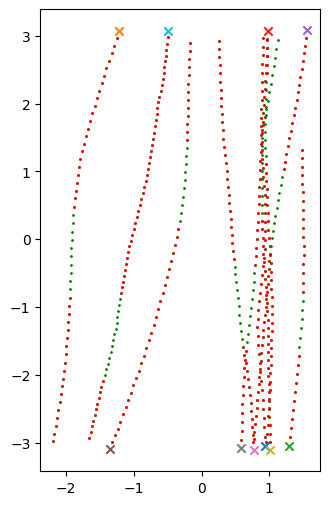

In [52]:
import sqlite3
import ast
import matplotlib.pyplot as plt

 

connnection = sqlite3.connect(dataDir + "\\tables\\trajectory.db")
cursor = connnection.cursor()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

cursor.execute("SELECT TRACK_ID,COMPLETE_TRAJECTORY,INCOMPLETE_TRAJECTORY FROM trajectory")
rows = cursor.fetchall()
counter = 0
limit = 20


for row in rows:
    track_id = row[0]
    complete_trajectory = ast.literal_eval(row[1])
    incomplete_trajectory = ast.literal_eval(row[2])
    
    
    last_point_ct = complete_trajectory[-1]
    endpointX,endpointY= last_point_ct[0], last_point_ct[1]
    
    print( complete_trajectory )
    print( incomplete_trajectory )
    
    x_values, y_values = zip(*complete_trajectory)
    x_values2, y_values2 = zip(*incomplete_trajectory)
    
    
    if counter == limit:
        break
    
    plt.scatter(x_values, y_values,color='green',s=1)
    plt.scatter(x_values2, y_values2,color='red',s=1)
    plt.scatter(endpointX,endpointY,marker="x")
    counter = counter+1
    

cursor.close()
connnection.close()

ax.set_aspect('equal', adjustable='box')
plt.show()